In [2]:
import pandas as pd

import requests
from urllib.parse import urlencode

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# сделаем функцию для открытия файлов из яндекс диска
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
def read_yandex(link, sep):
    final_url = base_url + urlencode(dict(public_key=link))
    response = requests.get(final_url)
    download_url = response.json()['href']
    download_response = requests.get(download_url)
    return pd.read_csv(download_url)


train = read_yandex('https://disk.yandex.ru/d/UHZyMb-LRQvlsw', ';')
train.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


In [4]:
train.info()
#неверный тип данных, но это мы исправим по мере выполнения заданий

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


Посмотрим какие значения принимают различные колонки для большего понимания работы с данными 

In [9]:
print(train['Class'].unique())
print(train['Region'].unique())
print(train['Sub-Category'].unique())

['Стандарт' 'Первый класс' 'Второй класс' 'Same Day']
['Урал' 'Владивосток' 'Калиниград' 'Москва']
['Appliances' 'Bookcases' 'Phones' 'Binders' 'Fasteners' 'Chairs' 'Paper'
 'Furnishings' 'Art' 'Storage' 'Labels' 'Accessories' 'Tables' 'Supplies'
 'Machines' 'Copiers' 'Envelopes']


In [10]:
train['ID'].nunique()
#заметим, что ID не повторяются

9800

In [11]:
#Возможно стоило бы переназвать колонки, чтобы они начинались с маленькой буквы, чтобы с ними было более удобно работать, 
#но возможно такова политика компании поэтому я не буду менять названия


 # Задание 1# 

 а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
 
 б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
 
 в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [12]:
a = train.groupby('Sub-Category')['Sales'].count().reset_index(name='Count').sort_values('Count', ascending = False)
a.head() #ТОП-5 подгрупп по частоте покупок за все время

,Sub-Category,Count
3,Binders,1492
12,Paper,1338
9,Furnishings,931
13,Phones,876
14,Storage,832


In [13]:
#посмотрим на дату и заметим, что в таблице она идет по убыванию.
#Так как последняя дата 30/12/2018, то чтобы нам посмотреть статистку за последние 
#два года необходимо взять дату больше чем 12/30/2016
#Так же приведем колонку Order Date к необходимому типу данных

In [14]:
train['Order Date'] = pd.to_datetime(train['Order Date'])
train.head(1)

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,"37229,08"


In [15]:
b = (train.query('`Order Date` > "2016-12-30"')
      .groupby('Sub-Category')['Sales']
      .count()
      .reset_index(name='Count')
      .sort_values('Count', ascending=False))
b.head() #ТОП-5 подгрупп по частоте покупок за последние два года

,Sub-Category,Count
3,Binders,907
12,Paper,809
9,Furnishings,558
13,Phones,510
14,Storage,491


In [16]:
round(b.Count.sum() / a.Count.sum() * 100, 2)
#Заметим, что за последние два года было совершено 59% покупок 

59.21

In [17]:
c = (train.query('`Order Date` > "2017-12-30"')
      .groupby('Sub-Category')['Sales']
      .count()
      .reset_index(name='Count')
      .sort_values('Count', ascending=False))
c.head() #ТОП-5 подгрупп по частоте покупок за последний год

,Sub-Category,Count
3,Binders,494
12,Paper,453
9,Furnishings,310
13,Phones,291
14,Storage,282


In [18]:
round(c.Count.sum() / a.Count.sum() * 100, 2)
#Заметим, что за последний год было совершено 33% покупок 

33.32

Вывод: Лидирующими остаются одни и те же подгруппы, которые с каждым годом наращивают объем продаж 

# Задание 2

Построить boxplot («Ящик с усами») на основе продаж (Sales). 

Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).


In [19]:
train['Sales'] = train['Sales'].str.replace(',', '.', regex=False)
train['Sales'] = pd.to_numeric(train['Sales'])


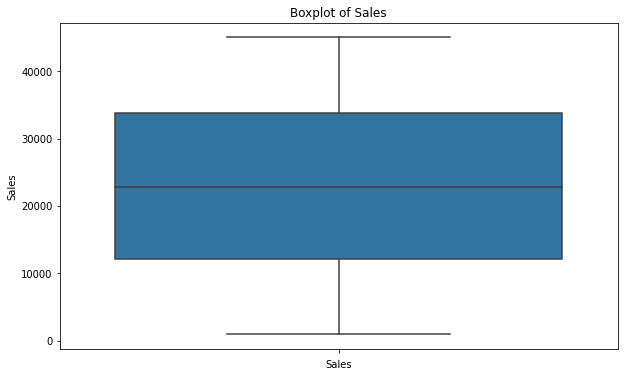

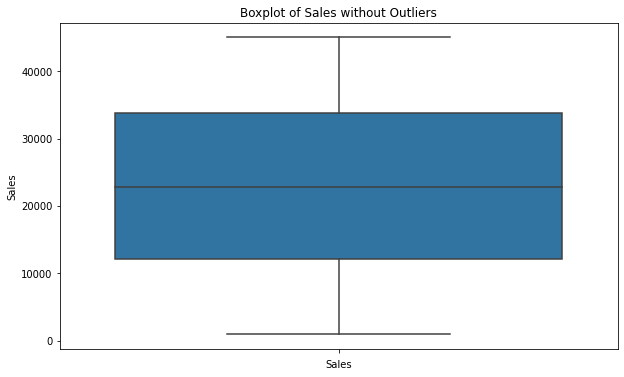

In [20]:

#  Построение boxplot для визуализации распределения
plt.figure(figsize=(10, 6))
sns.boxplot(y=train['Sales'])
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()

#  Вычисление среднего и стандартного отклонения
mean = train['Sales'].mean()
std = train['Sales'].std()

#  Определение границ
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

#  Удаление выбросов
train_no_outliers = train[(train['Sales'] >= lower_bound) & (train['Sales'] <= upper_bound)]


# Построение нового boxplot без выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(y=train_no_outliers['Sales'])
plt.title('Boxplot of Sales without Outliers')
plt.xlabel('Sales')
plt.show()


#  Задание 3

 Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group”

(Допустим маленькие продажи, средние и высокие) на основе Sales

Сгруппировать данные на основе региона и группы продаж (Region, Sale_group).

Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


In [167]:
train.Sales.max()

44995.41

In [168]:
train.Sales.min()

1002.794

In [169]:
train.Sales.mean()

22921.75773653061

Будем считать, что примерно 60% продаж это средние продажи, а 20% и 20% соответственно низкие и высокие. ПОдебрем числа так, чтобы наши ожидания совпадали с респределнием 

In [22]:
#  Определение групп продаж
def categorize_sales(sale):
    if sale < 10000:
        return 'Low'
    elif 15000 <= sale < 40000:
        return 'Medium'
    else:
        return 'High'

train['Sale_group'] = train['Sales'].apply(categorize_sales)

#  Группировка данных по Region и Sale_group
grouped_data = train.groupby(['Region', 'Sale_group']).agg({'Sales': 'sum'}).reset_index()

#  Анализ тенденций и паттернов
print("Grouped Data:\n", grouped_data)

# Определение наиболее прибыльной группы
most_profitable_group = grouped_data.loc[grouped_data['Sales'].idxmax()]

print("\nMost Profitable Group:\n", most_profitable_group)


Grouped Data:
          Region Sale_group         Sales
0   Владивосток       High  1.757291e+07
1   Владивосток        Low  3.106636e+06
2   Владивосток     Medium  4.327314e+07
3    Калиниград       High  1.964036e+07
4    Калиниград        Low  3.399870e+06
5    Калиниград     Medium  4.889007e+07
6        Москва       High  9.496287e+06
7        Москва        Low  1.798489e+06
8        Москва     Medium  2.559688e+07
9          Урал       High  1.334838e+07
10         Урал        Low  2.415069e+06
11         Урал     Medium  3.609514e+07

Most Profitable Group:
 Region         Калиниград
Sale_group         Medium
Sales         4.88901e+07
Name: 5, dtype: object


In [208]:
high_count = train.query('Sale_group == "High"').count().ID
medium_count = train.query('Sale_group == "Medium"').count().ID
low_count = train.query('Sale_group == "Low"').count().ID
print(f'Количество высоких продаж : {high_count}')
print(f'Количество средних продаж: {medium_count}')
print(f'Количество низких продаж: {low_count}')


Количество высоких продаж : 2233
Количество средних продаж: 5602
Количество низких продаж: 1965
